In [92]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

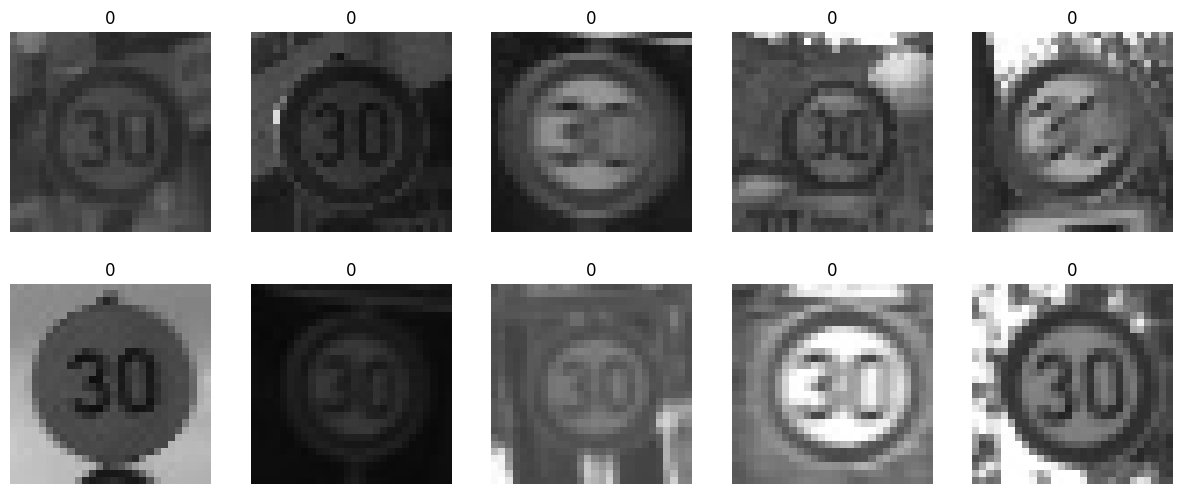

In [93]:
folder = 'data/subset_homework'

fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

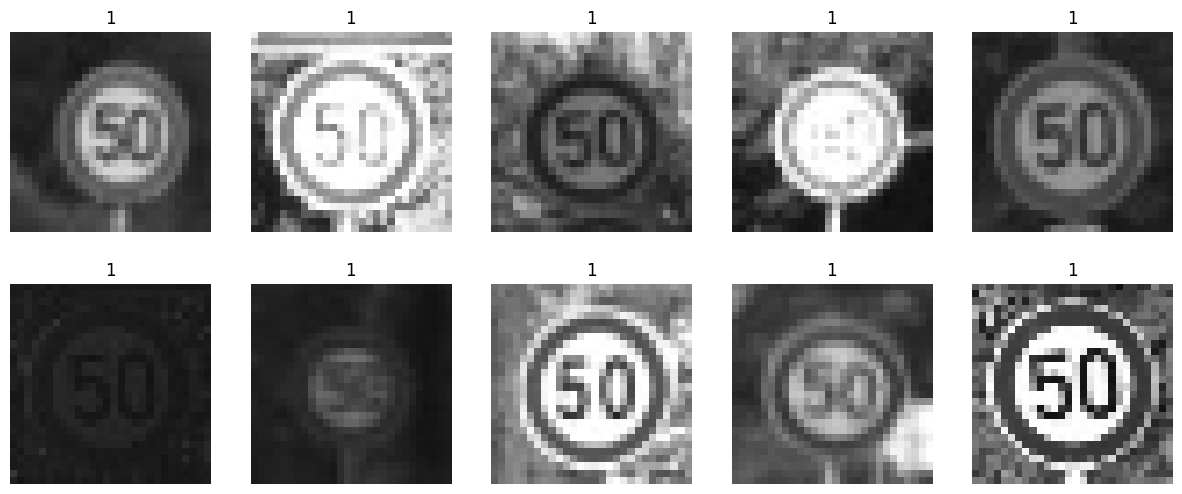

In [94]:
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [95]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [96]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [97]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.666456937789917


In [98]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.014000177383422852


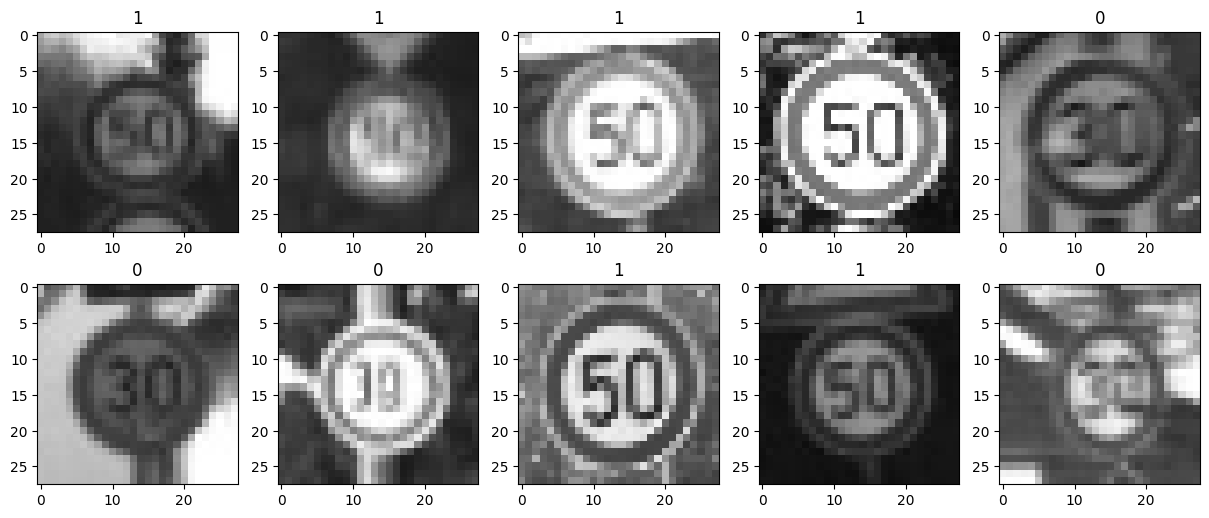

In [99]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [100]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [101]:
print(pixels.shape)
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

(4470, 784)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [103]:
history = model.fit(pixels, labels, epochs=20, batch_size=32)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.3727
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.2418
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.1957
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.1684
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1448
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.1247
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1181
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.1127
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.1070
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1038
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.0988
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.0939
Epoch 13/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.0869
Epoch 14/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.0895
Epoch 15/20
140/140 ━━━━━━━━━

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

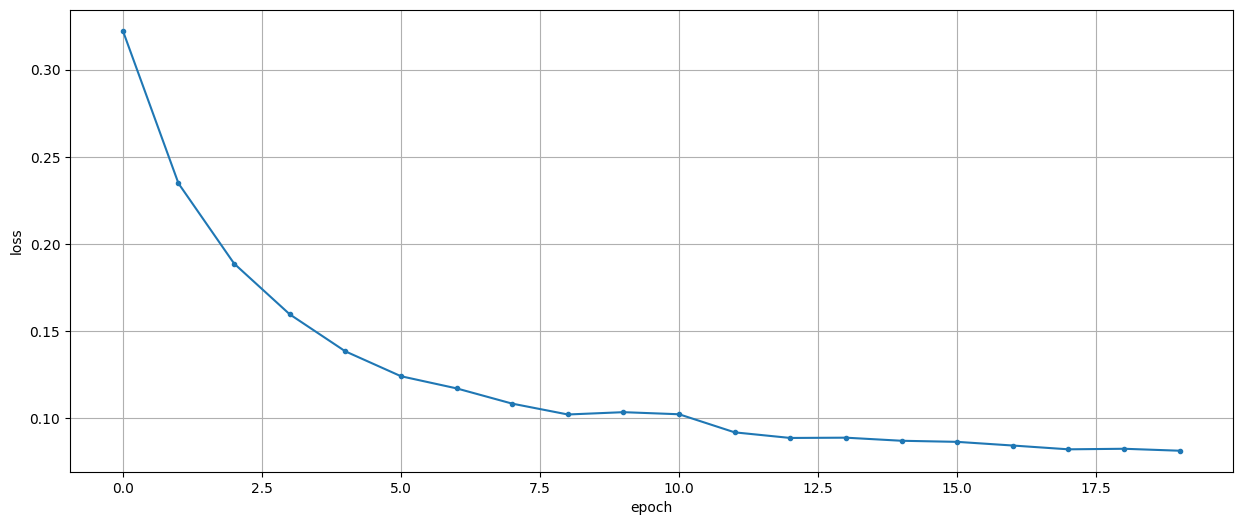

In [104]:
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

([<matplotlib.lines.Line2D at 0x1b40c4e37a0>], None)

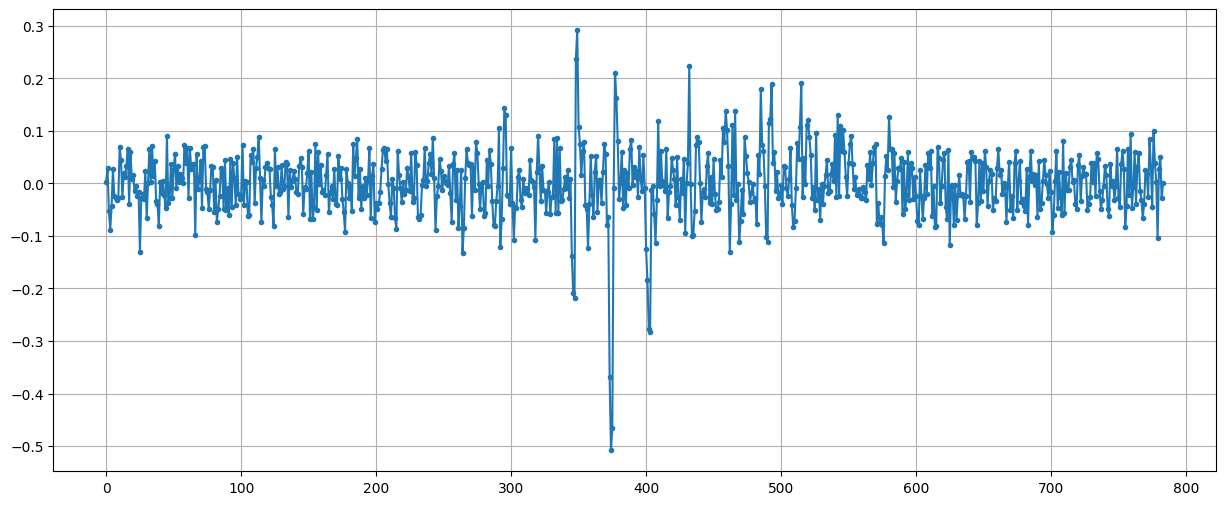

In [105]:
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)

In [106]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.027832]] 1


In [107]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


In [108]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9619686800894854


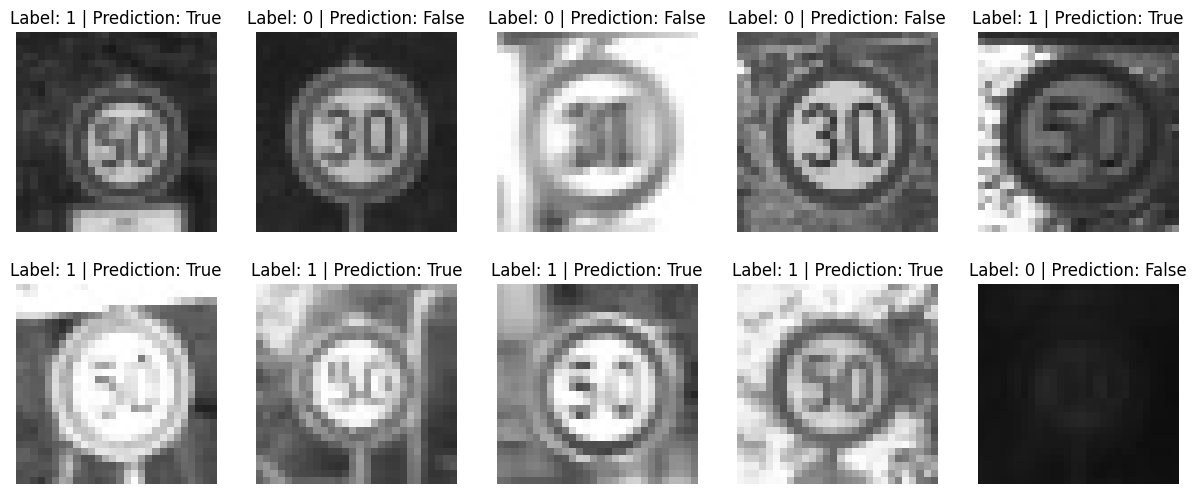

In [109]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Two neurons layers

In [117]:
def add_layer(inputs, neurons = 1, activation="linear"):
    return Dense(neurons, activation=activation)(inputs)

def learn_and_run_model(inputs, outputs, pixels, labels, epochs=20, batch_size=32):
    model = Model(inputs, outputs)
    model.compile(optimizer ='adam', loss = 'mean_squared_error')

    model.fit(pixels, labels, epochs=epochs, batch_size=batch_size)

    idx = 50
    pred = model.predict(pixels[idx:idx+1, ...])
    print(pred, labels[idx])
    
    predictions = model.predict(pixels).squeeze()
    predictions = predictions > 0.5

    correct = 0
    for prediction, label in zip(predictions, labels):
        if prediction == label:
            correct = correct + 1

    print('Accuracy', correct/len(labels))

    for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
        plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
        plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
        plt.axis(False)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 0.3901
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1625
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1286
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.1064
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.1057
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0992
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.1133
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0883
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0982
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0920
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.0858
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0866
Epoch 13/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0822
Epoch 14/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0831
Epoch 15/20
140/140 ━━━━━━━━━━━━━

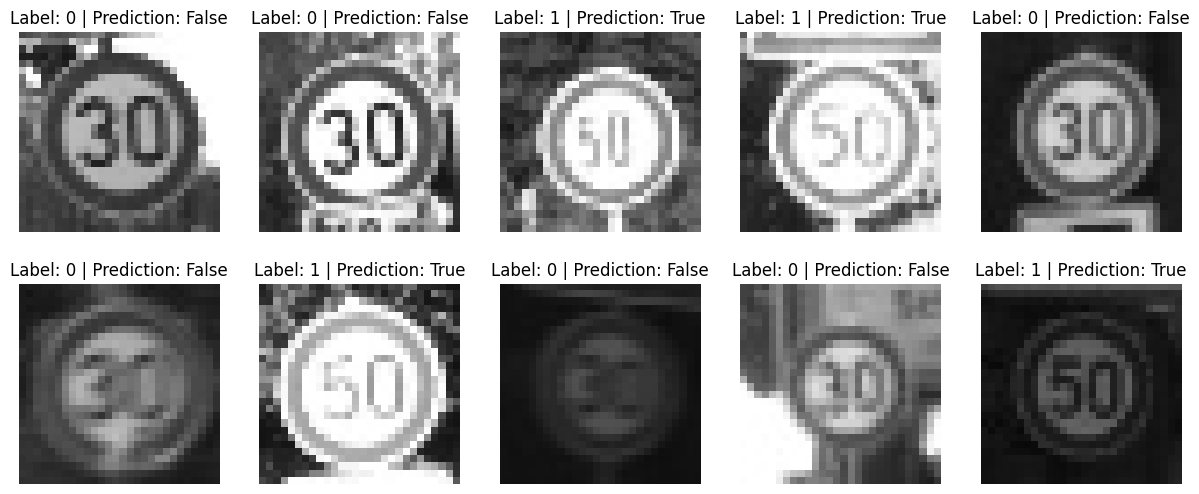

In [118]:
inputs_2 = Input(shape=(pixels.shape[1],))
outputs_2 = Dense(20, activation="linear")(inputs_2)
outputs_2 = Dense(1, activation="linear")(outputs_2)

learn_and_run_model(inputs=inputs_2, outputs=outputs_2, pixels=pixels, labels=labels)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 2.3967
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.2249
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.1736
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1280
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.1145
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.1203
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.1028
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.1039
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.1033
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0882
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0917
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0953
Epoch 13/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0891
Epoch 14/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.1079
Epoch 15/20
140/140 ━━━━━━━━━

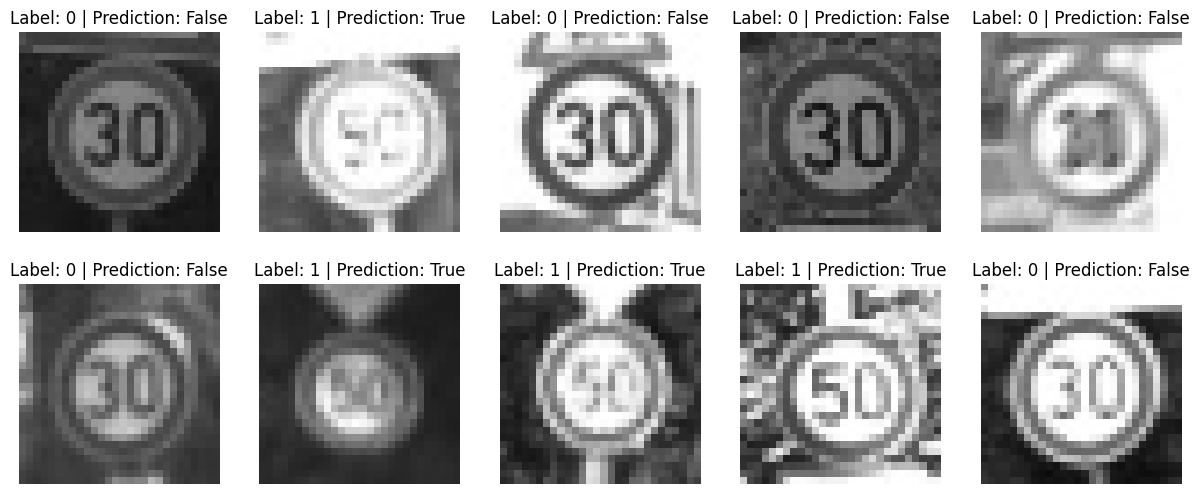

In [121]:
inputs_3 = Input(shape=(pixels.shape[1],))
outputs_3 = Dense(100, activation="linear")(inputs_3)
outputs_3 = Dense(20, activation="linear")(outputs_3)
outputs_3 = Dense(1, activation="linear")(outputs_3)

learn_and_run_model(inputs=inputs_3, outputs=outputs_3, pixels=pixels, labels=labels)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.3603
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.2420
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.1928
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.1668
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1484
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1330
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1230
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.1119
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.1060
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.1009
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0976
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0995
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.0924
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0905
Epoch 15/100
14

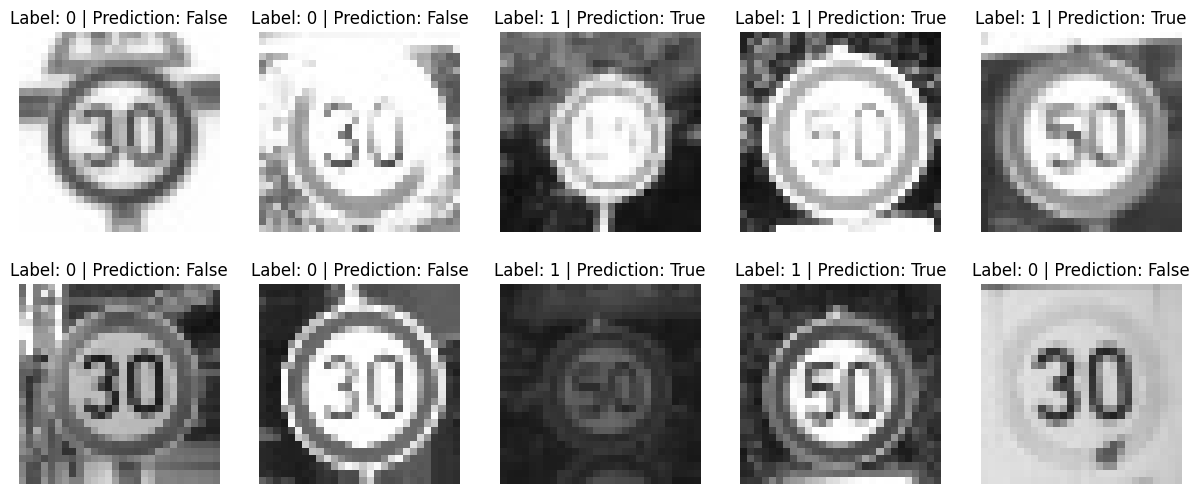

In [124]:
inputs_4 = Input(shape=(pixels.shape[1],))
outputs_4 = Dense(1, activation="linear")(inputs_4)

learn_and_run_model(inputs=inputs_4, outputs=outputs_4, pixels=pixels, labels=labels, epochs=100, batch_size=32)

### Results
* For class 0 we have 2220 images. For class 1 - 2250
* For single neuron we could achieve accuracy 0.9619686800894854 - for 20 epochs and 0.9751677852348993 for 100 epochs with 32 batch size
* Maximum accuracy we get if we increase epochs to 100 with one layer neurons model